# **Exercise - Model Performance**
# DATA 3300

## Name: RHETT JORGENSEN
## Exercise

# Q1

**Using the (full) `voters.csv` dataset, conduct a 5-fold cross-validated logistic regression analysis in Python. Assume the data set has already been checked for collinear independent variables, and found none.**

*   **Import the required libraries and packages**
*   **Import and view the dataset**
*   **Assign IVs to object called 'x', take any preprocessing steps**
*   **Assign DV to object called 'y', take any preprocessing steps**
*   **Perform 90-10 train-test split**
*   **Implement 5-fold cross-validated logistic regression on training set**



In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # libraries for data manipulation and visualizations

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics # functions from sklearn to perform cross-validation, and evaluate model performance

from sklearn.linear_model import LogisticRegression # logistic regression function from sklearn

In [3]:
# read in the dataset
df = pd.read_csv('/content/voters.csv')
df.head()

,ResponseID,Age,IncomeCat,MStatus,Religion,Homeowner,Defense,Healthcare,Privacy,Education,VIntent
0,1,61,2,married,Agnostic,y,3,3,4,2,Kang
1,2,26,1,married,Christian,n,2,5,3,4,Kang
2,3,28,2,divorced,Jewish,n,2,3,1,5,Kodos
3,4,23,1,married,Christian,n,3,1,3,2,Kodos
4,5,25,2,married,Christian,y,5,3,3,2,Kodos


In [4]:
# set IVs to x object
x = df.drop(['ResponseID', 'VIntent'], axis = 1)
# dummy code categorical IVs, drop_first = True
x = pd.get_dummies(data = x, drop_first = True)
# set DV to y object
y = df['VIntent']
# dummy code DV, drop_first = True
y = pd.get_dummies(data = y, drop_first = True)

In [5]:
# train-test split data with 90-10 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 100)

In [7]:
# specify parameters of CV
cv = KFold(n_splits = 5, random_state = 1, shuffle = True)
# set model to logistic regression
model = LogisticRegression()

In [8]:
# define scoring dictionary
scoring = {'acc' : 'accuracy', 'f1' : 'f1', 'precision' : 'precision', 'recall' : 'recall', 'roc_auc' : 'roc_auc', 'r2' : 'r2'}

In [9]:
# run cross-validate function on model using cv object on training set
scores = cross_validate(model, x_train, y_train, scoring = scoring, cv = cv, return_train_score = False)

# Q2
**Display the average cross-validated accuracy, f1-score, precision, recall, ROC-AUC, and $R^2$**

In [10]:
# display scores as a table, based on average CV scores
scores = pd.DataFrame(scores, columns = scores.keys())
scores.mean()

fit_time          0.017828
score_time        0.024645
test_acc          0.768553
test_f1           0.771031
test_precision    0.767188
test_recall       0.786852
test_roc_auc      0.859015
test_r2           0.057448
dtype: float64

## A

**List the $R^2$ value and interpret what it means.**

The cross validated $R^2$ is 0.057, meaning that the model explains about 5.7% of the variance in the predicted logit value.

## B

**List the ROC-AUC value and interpret what it means.**

We have an AUC value of 0.859, Meaning that the model performs better than random chance.

# Q3

**Generate a confusion matrix of the predicted outcome vs the actual outcome (`VIntent=Kodos`).**

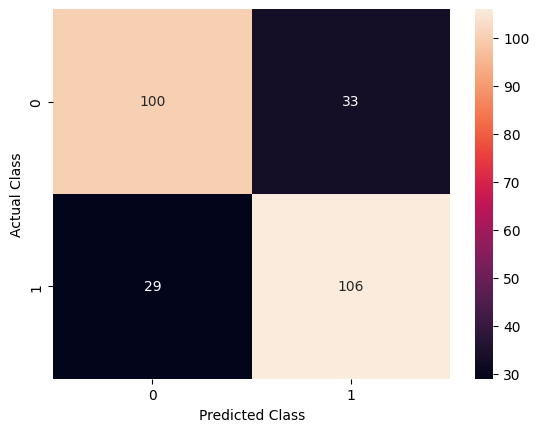

In [11]:
# create y_pred object
y_pred = cross_val_predict(model, x_train, y_train, cv = cv)
# generate confusion matrix of y_train (actual) against y_pred
conf = confusion_matrix(y_train, y_pred)
# display in heatmap
sns.heatmap(conf, annot = True, fmt = 'g')
sns.set(rc = {'figure.figsize':(12,10)})
# add labels for actual vs predicted
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

## A

**If `Vintent=Kodos` is the positive class, identify what TP, FP, TN, and FN mean in the context of this dataset, and provide the number of cases for each.**

* **TP** = Predicted Kodos, and the voters actually voted for kodos, 106 cases
* **FP** = Predicted Kodos, and the voters actually voted for kang, 33 cases
* **TN** = Predicted Kang, and the voters actually voted for Kang, 100 cases
* **FN** = Predicted Kang, and the voters actually voted for Kodos, 29 cases

## B

**Identify the costs of both types of model errors (FP and FN) for this specific dataset. Are these costs about the same or does one error cost more than the other?**

FP for this dataset would be cases where the model predicted Kodos when it was actually kang, FN would be cases where the model predicted Kang and it was actually Kodos. The cost of false positive and false negative are pretty equal here.

## C

**Is the distribution of the two outcome classes of the DV about even (within 60:40) or uneven (highly skewed)? State how you know this.**

In [13]:
# show class distribution through value_count()
y_train.value_counts()

Kodos
1        135
0        133
dtype: int64

The distribution is roughly a 50/50 split. We know this based on the value counts of the y_train.

## D

**What is the overall model accuracy? Given this data set, is this a good model performance metric to use? Why or why not?**

The overall CV accuracy is 76.8%. Since the costs of FP and FN are roughly the same and there is a roughly even class distribution overall accuracy is a fine metric to use.

## E

**Calculate the baseline accuracy using naive/apriori prediction. VIntent=Kodos is the positive class outcome. Is our model performing well? Why or why not?**

In [14]:
# print baseline accuracy calculation
print('basline accuracy = ', 147/len(df))

basline accuracy =  0.49328859060402686


The baseline accuracy is 49.3% and our model is performing at 76% which means our model is performing well.

## F

**What is the precision of the positive class and what does this mean? When should class precision be used to assess model peformance?**

0.767, the precision for the positive class (Kodos) is about 76.7% which means that of all the cases that predicted kodos the model was correct 76.7% of the time. You should use precision when the cost of FPs is greater.

## G

**What is the recall of the positive class and what does this mean? When should recall be used to assess model performance?**

0.787, the recall of the positive class is about 78.7%, meaning the model correctly predicted a case to be kodos when it was actually kodos  78.7% of the time. Recall should be used when the cost of FN's is greater.

# Q4

**Now let's examine some additional metrics including kappa, lift and $f_1$ score.**

## A

**What is the cross-validated kappa and what does it mean?**

In [15]:
# calculate Cohen's kappa
metrics.cohen_kappa_score(y_train, y_pred)

0.5371845579633447

Kappa = 0.54, kappa measures how well a model performs above chance. It ranges from 0-1, the closer to 1, the better the model. This Kappa value would be considered good/moderate.

## B

**Calculate the lift value and explain what it means.**

In [16]:
# print the lift calculation
print('lift = ', 0.767/0.493)

lift =  1.5557809330628805


Lift ranges from 0 to infinity, the higher the better the model. This model perfroms 1.56 times better than a baseline prediction at identifying truly positive cases.

## C

**What is the $f_1$ score and what does it mean? Also describe when this metric should be used.**

0.771031, f-1 score is 77.1%. F-1 ranges from 0-1, where the closer to 1, the better the model. This would be considered a good f-1 score. f-1 should be used when the costs of FN and FP are roughly the same.

# Q5

**Develop and run a second Logistic Regression model with 5-fold cross-validation that excludes age, homeowner, income category, marital status and religion as IVs.**

**Then compute the accuracy, precision, recall, f1, auc-score, kappa, and lift.**

In [19]:
# create second x_train object, drop out selected variables
x_train_2 = x_train[['Defense', 'Healthcare', 'Privacy', 'Education']]
x_train_2.head()

,Defense,Healthcare,Privacy,Education
262,2,4,5,5
263,3,3,2,3
15,3,1,4,1
249,1,1,4,2
286,4,3,2,5


In [20]:
# run cross_validation of x_train_2 using same cv object
scores2 = cross_validate(model, x_train_2, y_train, scoring = scoring, cv = cv, return_train_score = False)

In [21]:
# display average cv scores across the 5-folds in table for model 2
scores2 = pd.DataFrame(scores2, columns = scores2.keys())
np.abs(scores2.mean())

fit_time          0.005266
score_time        0.021098
test_acc          0.656534
test_f1           0.662508
test_precision    0.651723
test_recall       0.682054
test_roc_auc      0.685199
test_r2           0.400223
dtype: float64

In [22]:
# calculate Cohen's kappa on model 2
y_pred = cross_val_predict(model, x_train_2, y_train, cv = cv)
metrics.cohen_kappa_score(y_train, y_pred)

0.3131650788344754

In [23]:
# print lift calculation on model 2
print('Lift = ', 0.651/0.493 )

Lift =  1.3204868154158216


# Q6

**Compare model 1 and model 2 on their performance metrics by displaying both model's cross-validated metrics in a table below.**

In [24]:
# set models object as model 1 scores and model 2 scores
model_1 = scores.mean()
model_2 = np.abs(scores2.mean())
models = model_1, model_2

In [25]:
# display model 1 and model 2 scores in table
models_compare = pd.DataFrame(data = models, index = ['model_1', 'model_2'],
                              columns = ['fit_time', 'score_time', 'test_acc', 'test_f1', 'test_precision', 'test_recall', 'test_roc_auc', 'test_r2'])
models_compare

,fit_time,score_time,test_acc,test_f1,test_precision,test_recall,test_roc_auc,test_r2
model_1,0.017828,0.024645,0.768553,0.771031,0.767188,0.786852,0.859015,0.057448
model_2,0.005266,0.021098,0.656534,0.662508,0.651723,0.682054,0.685199,0.400223


## A

**Which model performed best overall? How do you know?**

model_1 outperformed model_2 on every metric that is relevant. So model_1 is the best performing model.

## B

**Fit the best performing model to the test set. How does the model perform on the test-set? Is there any evidence of over-fitting?**

In [26]:
# fit model to training set (containing all IVs)
model.fit(x_train, y_train)
# predict model onto test set
predictions = model.predict(x_test)

In [27]:
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        18
           1       0.60      0.75      0.67        12

    accuracy                           0.70        30
   macro avg       0.70      0.71      0.70        30
weighted avg       0.72      0.70      0.70        30



accuracy is about 6% lower, recall is only about 3% lower, precision dropped about 16% and f1 dropped about 9%.

This means there may have been some overfitting. The model still provides lift over random chance alone. The model therefore is still useful and is better than random chance.